# UJIAN AKHIR SEMESTER
# ARIFICIAL INTELLIGENCE
- NAMA: MASAGUS MUHAMMAD FAZRI SAFIQ RYADHI
- NIM : 09011381722086
- KELAS : SK5 

# PLANTAR FASCIITIS

Plantar fasciitis adalah kondisi di mana kaki mengalami inflamasi (bengkak) yang menyebabkan nyeri tumit. Fasia telapak kaki merupakan sekumpulan jaringan seperti karet gelang  di bawah tulang kaki. Fasia ini menempel dengan ujung tulang dekat tumit dan jari kaki. Saat fasia telapak kaki meradang, pasien akan merasakan nyeri tajam dekat tumit, khususnya saat berjalan di pagi hari.

# Import Library

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns

- import numpy = untuk menginput Array
- sklearn.preprocessing = digunakan untuk memproses data pada GPU 
- import matplotlib.pyplot = digunakan untuk membentuk gafik pada dataset
- sklearn.model_selection = untuk merubah dataset menjadi data Training, data Testing dan data aslinya
- keras.optimizers = untuk mengoptimalkan kerja Keras dengan fungsi Adam
- keras.models = untuk memasukan banyaknya jalan pada satu data ke data yang lain (Hiiden Layers) dengan Sequential
- keras.layers = untuk menjalankan banyaknya Hidden Layers pada satu data
- keras.activations = digunakan untuk mengubah setiap nilai input yang negatif menjadi 0 pada grafik
- Import pandas = berguna untuk membaca dataset dalam bentuk CSV
- import seaborn = berguna untuk melakukan visualisasi pada dataset 

# Import Dataset

In [23]:
datasett=pd.read_csv("dataset.csv")
datasett.head()

,id,age,sex,weight,hoursRunInAWeek,highHealWear,multipleJointPains,allignmentOfMidFoot,diabetes,cyanosis,burningSensationInPS,Tenderness,Status
0,1,21,0,55,7,0,0,0,0,0,0,0,0
1,2,14,0,57,7,0,0,0,0,0,0,1,0
2,3,21,0,51,12,0,0,0,0,0,1,0,0
3,4,23,0,42,8,0,0,0,0,0,1,1,0
4,5,12,0,62,9,0,0,0,0,1,0,0,0


Sc: https://www.kaggle.com/rameessahlu/plantar-fasciitis 

Pada dataset diatas terdapat 13 kolom dan 384 baris dimana terdiri dari
- age = umur, semakin tua pasien semakin besar resiko untuk terkena penyakit ini
- sex = jenis kelamin pada pasien (laki-laki= 1, wanita= 0) wanita lebih bersiko terkena penyakit ini
- weight = berat badan Obesitas adalah salah satu faktor risiko untuk plantar fasciitis dan kelebihan berat badan memberi tekanan ekstra pada plantar fascia 
- hoursRunInAWeek = lari jarak jauh dan aktivitas apa pun yang menempatkan banyak tekanan pada tumit dan jaringan yang menempel
- highHealWear = Penggunaan sepatu High Heal dimana pemicu penyakit plantar fascia
- multipleJointPains = Bisa karena Artritis
- allignmentOfMidFoot = normal-0, high_arch-1, flat-2 (Menjadi kaki datar, memiliki lengkungan tinggi atau bahkan memiliki pola berjalan yang tidak normal dapat mempengaruhi cara distribusi berat badan)
- diabetes = pasien yang menderita penyakit diabetes lebih berpotensi terkena plantar fascia
- cyanosis = perubahan kulit atau bukti sianosis
- burningSensationInPS = Sensasi terbakar pada sesi plantar
- Tenderness = Nyeri untuk palpasi di atas tibia, fibula, malleoli, tarsal, metatarsal, metacarpophalangeal
- Status = Plantar fasciitis status

# Mengecek Keseimbangan Data

In [24]:
datasett.Status.value_counts()

0    279
1    105
Name: Status, dtype: int64

perintah ini berguna untuk memperlihatkan jumlah data yang berlabel sakit (1) atau sehat (0) bisa dilihat kalau pasien yang berlebel sakit sebanyak 105 orang dan yang berlebel sehat sebanyak 279 orang 

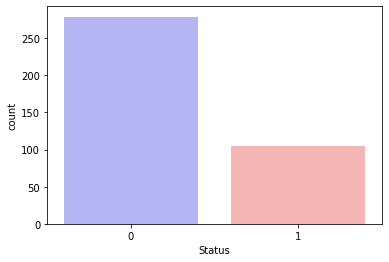

In [25]:
sns.countplot(x="Status", data=datasett, palette="bwr")
plt.show()

Berikut adalah grafik untuk menentukan status untuk penyakit plantar fascitiis dimana menggunakan Library Seaborn

# Jumlah dari semua data

In [26]:
datasett.groupby("Status").mean()

,id,age,sex,weight,hoursRunInAWeek,highHealWear,multipleJointPains,allignmentOfMidFoot,diabetes,cyanosis,burningSensationInPS,Tenderness
Status,,,,,,,,,,,,
0,200.903226,34.903226,0.566308,59.014337,2.25448,0.498208,0.498208,0.888889,0.329749,0.512545,0.501792,0.498208
1,170.171429,52.533333,0.323810,73.057143,1.32381,0.504762,0.504762,1.295238,0.952381,0.466667,0.495238,0.504762


berikut adalah jumlah dari semua baris pada setiap kolom pada dataset

# Memasukan Features dan Labels

In [161]:
features = datasett.iloc[:, 0:12]
labels = datasett.iloc[:, 12]

features dimulai dari 12 kolom sedangkan features mengambil kolom 13
- features mengambil dari kolom age sampai Tenderness
- Labels mengambil kolom terakhir "status"

# Scalling

In [162]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Scaling untuk mengalihkan data dagar tidak memiliki standat deviasi yang tinggi dan data diukur ulang dimana nilainya minimal 0 dan maximal 1 dimana menggunakan metode normalisasi yaitu MinMaxScaler

# Splitting

In [163]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

- training_data = mengubah data features menjadi data training
- testing_data = mengubah data features menjadi data testing
- training_label = mengubah data labels menjadi data training
- testing_label = mengubah data labels menjadi data testing
- train_test_split () = membagikan antara data training dan data testing pada labels dan features

# Modelling

In [164]:
model = Sequential()
model.add(Dense(units= 25, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 25, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Model yang digunakan untuk membuat hidden layer dan memproses data adalah dengan menggunakan fungsi Sequential, sedangkan layer sendiri menggunakan tipe Dense yang melakukan teraining dengan menghubungkan setiap neural network secara sequential.

# Training

In [165]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=50, epochs=245)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 307 samples, validate on 77 samples
Epoch 1/245
307/307 [==============================] - 0s 474us/step - loss: 0.7632 - accuracy: 0.4788 - val_loss: 0.6681 - val_accuracy: 0.6883
Epoch 2/245
307/307 [==============================] - 0s 45us/step - loss: 0.7143 - accuracy: 0.5244 - val_loss: 0.6201 - val_accuracy: 0.6623
Epoch 3/245
307/307 [==============================] - 0s 42us/step - loss: 0.6728 - accuracy: 0.5798 - val_loss: 0.5902 - val_accuracy: 0.6883
Epoch 4/245
307/307 [==============================] - 0s 62us/step - loss: 0.6383 - accuracy: 0.6678 - val_loss: 0.5700 - val_accuracy: 0.7403
Epoch 5/245
307/307 [==============================] - 0s 55us/step - loss: 0.6203 - accuracy: 0.6710 - val_loss: 0.5571 - val_accuracy: 0.7403
Epoch 6/245
307/307 [==============================] - 0s 52us/step - loss: 0.6161 - accuracy: 0.6873 - val_loss: 0.5464 - val_accuracy: 0.7273
Epoch 7/245
307/307 [==============================] - 0s 55us/step - loss: 0.6005 - accur

307/307 [==============================] - 0s 46us/step - loss: 0.2162 - accuracy: 0.9088 - val_loss: 0.1712 - val_accuracy: 0.9610
Epoch 114/245
307/307 [==============================] - 0s 42us/step - loss: 0.2121 - accuracy: 0.9186 - val_loss: 0.1702 - val_accuracy: 0.9610
Epoch 115/245
307/307 [==============================] - 0s 42us/step - loss: 0.2090 - accuracy: 0.9186 - val_loss: 0.1721 - val_accuracy: 0.9351
Epoch 116/245
307/307 [==============================] - 0s 39us/step - loss: 0.2145 - accuracy: 0.9186 - val_loss: 0.1780 - val_accuracy: 0.9351
Epoch 117/245
307/307 [==============================] - 0s 43us/step - loss: 0.2361 - accuracy: 0.9121 - val_loss: 0.1730 - val_accuracy: 0.9481
Epoch 118/245
307/307 [==============================] - 0s 39us/step - loss: 0.2047 - accuracy: 0.9121 - val_loss: 0.1724 - val_accuracy: 0.9351
Epoch 119/245
307/307 [==============================] - 0s 40us/step - loss: 0.2217 - accuracy: 0.9186 - val_loss: 0.1759 - val_accuracy:

307/307 [==============================] - 0s 49us/step - loss: 0.1190 - accuracy: 0.9609 - val_loss: 0.1115 - val_accuracy: 0.9610
Epoch 226/245
307/307 [==============================] - 0s 45us/step - loss: 0.1547 - accuracy: 0.9479 - val_loss: 0.1057 - val_accuracy: 0.9740
Epoch 227/245
307/307 [==============================] - 0s 45us/step - loss: 0.1349 - accuracy: 0.9414 - val_loss: 0.1053 - val_accuracy: 0.9740
Epoch 228/245
307/307 [==============================] - 0s 52us/step - loss: 0.1380 - accuracy: 0.9544 - val_loss: 0.1051 - val_accuracy: 0.9740
Epoch 229/245
307/307 [==============================] - 0s 42us/step - loss: 0.1262 - accuracy: 0.9544 - val_loss: 0.1060 - val_accuracy: 0.9740
Epoch 230/245
307/307 [==============================] - 0s 45us/step - loss: 0.1388 - accuracy: 0.9251 - val_loss: 0.1079 - val_accuracy: 0.9740
Epoch 231/245
307/307 [==============================] - 0s 42us/step - loss: 0.1332 - accuracy: 0.9642 - val_loss: 0.1073 - val_accuracy:

- Epoch adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).
- Batch Size adalah jumlah sampel data yang disebarkan ke Neural Network.

In [166]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9740259647369385


In [167]:
acc_training.history

{'val_loss': [0.6680752913673202,
  0.6201273504789774,
  0.5901632061252347,
  0.5700347988636463,
  0.5571170100918064,
  0.5463580969092133,
  0.5390781442840378,
  0.5337575279272996,
  0.5280228628740682,
  0.5214947260819472,
  0.5137980859000961,
  0.5066238363067825,
  0.4982575108478596,
  0.4893863448848972,
  0.4807205118916251,
  0.47168350026204986,
  0.4623553195557037,
  0.45250525219099863,
  0.4430908227895761,
  0.43418727679686114,
  0.42341019658299234,
  0.4121941204194899,
  0.4013893948746966,
  0.39127074743246104,
  0.38060101982835054,
  0.3712467558972247,
  0.36396745621383964,
  0.35677964772496906,
  0.3488919158260544,
  0.3419965188224594,
  0.33732561941270706,
  0.33219190270869764,
  0.32637165390051803,
  0.3204658070167938,
  0.3155512921995931,
  0.31007794358513574,
  0.3058832280047528,
  0.30618303627162785,
  0.3011911635275011,
  0.29450808523537275,
  0.29078315566112467,
  0.2924730321029564,
  0.29135404546539506,
  0.28421661412561094,
  0

Hasil dari semua proses training

# Visualisasi

Setelah melakukan Training Data berikut adalah hasil Grafik. Berikut adalah hasil dari bentuk grafik yang pertama menampilkan hasil akurasi yang kedua menampilkan hasil loss

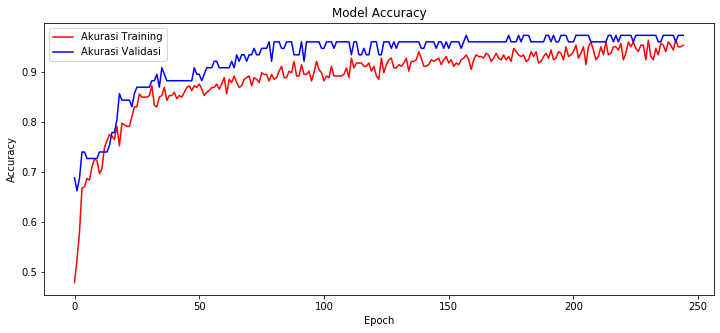

In [168]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

Berikut adalah hasil grafik pada akurasi

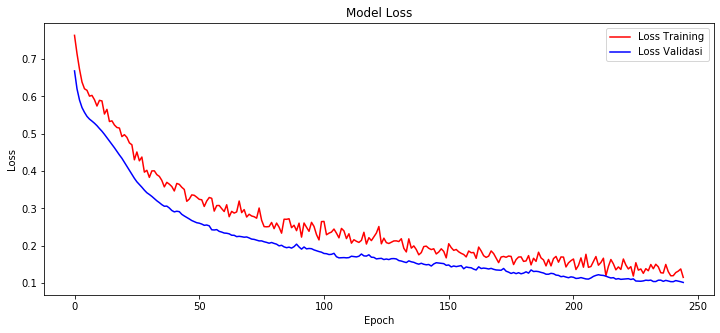

In [169]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')


Berikut adalah hasil grafik pada loss

In [170]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [171]:
training_predicted.round()

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

# Confusion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya

Pada jenis klasifikasi binary yang hanya memiliki 2 keluaran kelas, confusion matrix dapat disajikan seperti ini:

$Kelas$                         

- Terklasifikasi Positif

- Terklasifikasi Negatif
  
$Positif$
  
- TP (True Positive)

- FN (False Negative)

$Negatif$

- FP (False Positive)

- TN (True Negative)

Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai akurasi, presisi dan recall. Nilai akurasi menggambarkan seberapa akurat sistem dapat mengklasifikasikan data secara benar. Dengan kata lain, nilai akurasi merupakan perbandingan antara data yang terklasifikasi benar dengan keseluruhan data.

In [172]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

Berikut adalah import library Confusion Matrix .Matriks Confusion disini terdiri dari 2 jenis, yakni Training_cm (Matriks Confusion untuk data trainig) dan Testing_cm (Matriks Confusion untuk data testing)

Pada training_cm terlihat:
- TP bernilai 219 
- FP bernilai 4 
- FN bernila 6 
- TN bernilai 78 

# Rumus Confusion Matrix

Setiap Confusion Matrix dapat menghitung Accuracy, Specificity, Sensitivity, Precision, dan F1 Score dari data training dan testing dengan menggunakan rumus berikut
- rumus akurasi
$$=\frac {tp+tn}{tp+tn+fp+fn}$$
- rumus Specificity
$$=\frac {tn}{tn+fp}$$
- rumus Sensitivity
$$=\frac {tp}{tp+fn}$$
- rumus Precision
$$=\frac {tp}{tp+fp}$$
- rumus F1 Score
$$=\frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

In [173]:
training_cm

array([[219,   4],
       [  6,  78]], dtype=int64)

In [174]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9674267100977199
Specificity training 0.9285714285714286
Sensitivity training 0.9820627802690582
Precision training 0.9733333333333334
F1 Score training 0.9776785714285715


menghitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

In [175]:
testing_cm

array([[55,  1],
       [ 1, 20]], dtype=int64)

In [176]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.974025974025974
Specificity testing 0.9523809523809523
Sensitivity testing 0.9821428571428571
Precision testing 0.9821428571428571
F1 Score testing 0.9821428571428571


menghitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

PAPER: High‐load strength training improves outcome in patients with plantar fasciitis: A randomized controlled trial with 12‐month follow‐up